# Using the TRS library to access the trace file

The trs library can be used to access a trace file(.trs format)

In [1]:
import trsfile
import matplotlib.pyplot as plt
import numpy as np

We can use the trsfile.open function to read a trace file from the disk namely "Misalignment example.trs"
The trace file consists of 10 side channel traces which are misaligned from the original trace making them unique traces.
The Inspector tool from Riscure has a function named Static Align which can be used to align the traces at a desired area using correlation.

For this purpouse, we first need to select a reference area/pattern that we intent to align and then use the static align feature.

This then provides us with the reference pattern occurences in all the 10 traces which is an offset shift from the selected reference pattern.



Note: Always make sure that the trace file is present on the working directory 

In the cell below, we select a reference trace of length 154 which occurs at 14206 on Trace 0.

The occurences of this reference pattern  on all traces namely trace0 .. trace 9 can be as seen [0,563,462,552,204,428,-4727,867,337,229] which are offset shift values from 14206(the point of occurence of selected reference pattern)

These are points where the correlation is the highest in each trace

In [8]:
# Pattern specifications
# Ignore the NOISEFACTOR

NOISEFACTOR = 10
REF_LENGTH = 154
REF_OFFSET = 14206

# Processing and labelling

pattern = None
actual_shift_values = [0,563,462,552,204,428,-4727,867,337,229]
train_values = []
train_labels = []
test_values = []
test_labels = []
with trsfile.open('Misalignment example.trs', 'r') as traces:
    for i, trace in enumerate(traces) :
        if i < 7:
            for j in range(len(trace)-REF_LENGTH):
                current_window_train = trace.samples[j:j+REF_LENGTH]
                if j == REF_OFFSET + actual_shift_values[i]:
                    if pattern is None:
                        
                        pattern = current_window_train


                    for k in range(29000):
                        train_values.append(current_window_train + np.random.normal(0,NOISEFACTOR,current_window_train.shape).astype('int8'))
                        train_labels.append(1)
                        # label match             
                else:
                    train_values.append(current_window_train + np.random.normal(0,NOISEFACTOR,current_window_train.shape).astype('int8'))
                    train_labels.append(0)
                    # label false
        else:
            for l in range(len(trace)-REF_LENGTH):
                current_window_test = trace.samples[l:l+REF_LENGTH]
                if l == REF_OFFSET + actual_shift_values[i]:
                    test_values.append(current_window_test + np.random.normal(0,NOISEFACTOR,current_window_train.shape).astype('int8'))
                    test_labels.append(1)
                    # label match
                else:
                    test_values.append(current_window_test + np.random.normal(0,NOISEFACTOR,current_window_train.shape).astype('int8'))
                    test_labels.append(0)
                    # label false
                    
                    
X_train = np.array(train_values)
y_train = np.array(train_labels)
X_test = np.array(test_values)
y_test = np.array(test_labels)

Below we can visualize the selected reference pattern

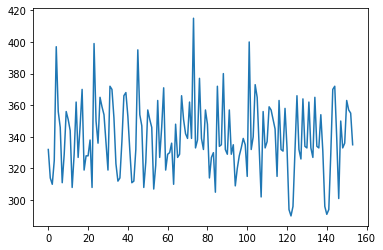

In [9]:
plt.plot(pattern)

Here are some other reference patterns and thier occurences which can be substituted in the REF_LENGTH ,REF_OFFSET and actual_shift_values in the code above

1.

REF OFFSET: 13898

REF LENGTH: 82

actual_shift_values = [0,563,462,552,204,428,-4727,867,337,229]  



2.







REF OFFSET: 21471

REF LENGTH: 1153

actual_shift_values = [0,554,435,525,60,410,-4736,804,310,85]



